In [6]:
import pandas as pd
import numpy as np

In [7]:
#read data
spam_df = pd.read_csv('../spam.csv', encoding='latin-1')

spam_df = spam_df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
spam_df['label'] = spam_df['label'].map({'ham': 0, 'spam': 1})

spam_df = spam_df.drop_duplicates(keep='first')

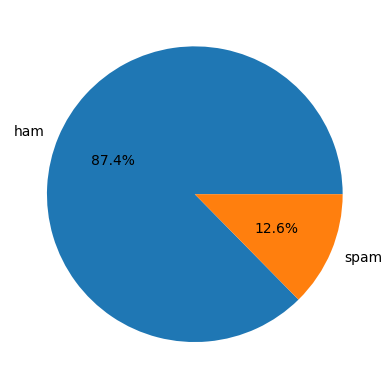

In [8]:
import matplotlib.pyplot as plt

plt.pie(spam_df['label'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.show()

In [9]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))
    
    return " ".join(y)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\minhq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\minhq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
spam_df['transform_message'] = spam_df['message'].apply(transform_text)

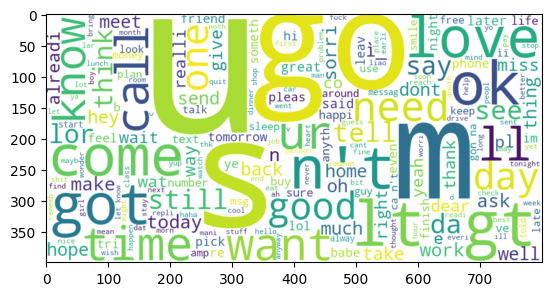

In [18]:
from wordcloud import WordCloud


# # Display the word cloud of spam messages
# wc = WordCloud(width=800, height=400, max_words=200,background_color='white').generate(' '.join(spam_df[spam_df['label'] == 1]['transform_message']))
# plt.imshow(wc, interpolation='bilinear')
# # Display the word cloud of ham messages
wc = WordCloud(width=800, height=400, max_words=200,background_color='white').generate(' '.join(spam_df[spam_df['label'] == 0]['transform_message']))

plt.imshow(wc, interpolation='bilinear')

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2500)

X = cv.fit_transform(spam_df['transform_message']).toarray()
y = spam_df['label'].values

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [14]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9835589941972921
0.9481481481481482
0.927536231884058
0.9377289377289377


In [ ]:
#save model

import pickle

pickle.dump(model, open('naive_bayes.pkl', 'wb'))
pickle.dump(cv, open('naive_bayes_cv.pkl', 'wb'))